In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_excel("./src/assets/output/results/resultado_RCE_1.xlsx")
df


def stringArrayToList():

    valores = df["Variaveis Decisão"].values
    array = []
    array_near_zero = []

    # Iterate through each value (assuming each value is a string representation of a list)
    for value_str in valores:
        try:
            # Remove leading and trailing brackets (if present)
            value_str = value_str.strip("[]")

            # Convert string to a list of floats
            value_list = [float(item) for item in value_str.split(",")]

            # Add the converted list to the array
            array.extend(value_list)  # Use extend for appending multiple values
        except ValueError:
            # Handle conversion errors (optional)
            print(f"Warning: Failed to convert '{value_str}' to float list. Skipping.")

    # Print the resulting array of numerical values
    print(array)

    for value in array:
        if abs(value) <= 0.06:
            array_near_zero.append(value)

    return array_near_zero

In [11]:
def ler_e_concatenar_excel(caminho_arquivos):
    df_final = pd.DataFrame()

    for arquivo in caminho_arquivos:
        df_temp = pd.read_excel(arquivo)
        # Ajustar o index para evitar duplicatas
        df_temp.index += len(df_final)
        df_final = pd.concat([df_final, df_temp], ignore_index=True)

    return df_final


caminho_arquivos = "./src/assets/output/results/"
numero_arquivos = 20  # Ajuste o número de arquivos

# Criar lista de caminhos de arquivo
lista_arquivos = []
for i in range(1, numero_arquivos + 1):
    nome_arquivo = f"resultado_RCE_{i}.xlsx"
    caminho_arquivo = os.path.join(caminho_arquivos, nome_arquivo)
    lista_arquivos.append(caminho_arquivo)

# Ler e concatenar os arquivos
df_consolidado = ler_e_concatenar_excel(lista_arquivos)

# Exibir o DataFrame consolidado
display(df_consolidado)
df_consolidado.to_excel(
    "./src/assets/output/resultado consolidado/resultado_consolidado.xlsx",
    index=False,
)
df_consolidado


FileNotFoundError: [Errno 2] No such file or directory: './src/assets/output/results/resultado_RCE_2.xlsx'

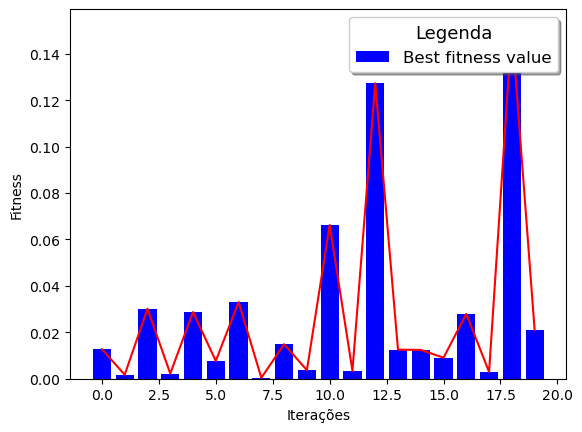

In [12]:


df_consolidado = pd.read_excel("./src/assets/output/resultado consolidado/resultado_consolidado.xlsx")

plt.plot(df_consolidado["Best Fitness Value"], color="red")

plt.xlabel("Iterações")
plt.ylabel("Fitness")


plt.bar(
    df_consolidado["Resultado"] - 1,
    df_consolidado["Best Fitness Value"],
    color="blue",
    label="Best fitness value",
)
plt.legend(
    title="Legenda",
    title_fontsize="13",
    loc="upper right",
    fontsize="12",
    shadow=True,
    facecolor="white",
)

plt.show()

[-0.004, 0.014, 4.201, -0.54, 0.918, 0.435, -3.261, 3.405, -3.266, 3.058]


/tmp/ipykernel_123317/1627336378.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(


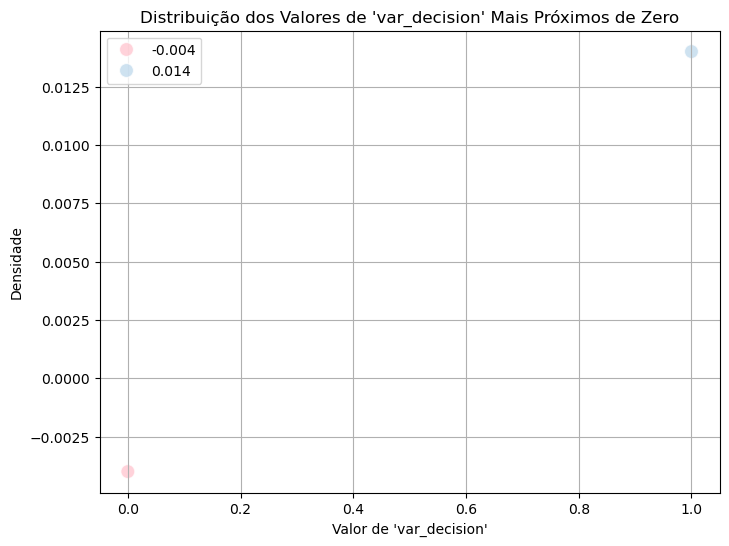

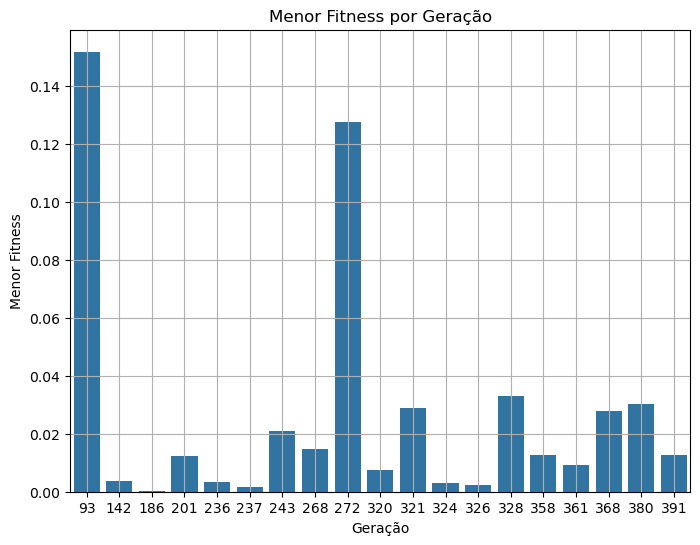

In [16]:
var_decision_near_zero = stringArrayToList()

plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Blues",)  # Create a red color palette with 2 colors
cmap[0] = "pink"  # Assign red to the first color (value 0)
# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=range(len(var_decision_near_zero)),
    y=var_decision_near_zero,
    hue=var_decision_near_zero,
    palette=cmap,
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)
plt.title("Distribuição dos Valores de 'var_decision' Mais Próximos de Zero")
plt.xlabel("Valor de 'var_decision'")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# 3. Bar plot of lowest fitness values by generation
lowest_fitness_by_gen = df_consolidado.groupby("Solution Generation")[
    "Best Fitness Value"
].min()
plt.figure(figsize=(8, 6))
sns.barplot(x=lowest_fitness_by_gen.index, y=lowest_fitness_by_gen.values)
plt.title("Menor Fitness por Geração")
plt.xlabel("Geração")
plt.ylabel("Menor Fitness")
plt.grid(True)
plt.show()

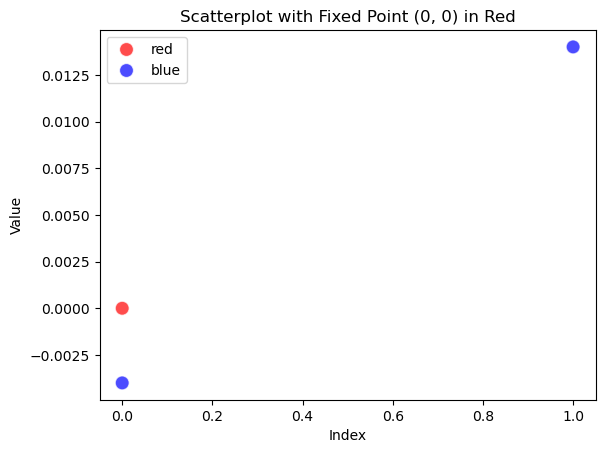

In [15]:
import pandas as pd
import seaborn as sns  # Import Seaborn for scatterplot
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the filtered values are stored in 'var_decision_near_zero'

# Prepare data for scatterplot
x_data = list(range(len(var_decision_near_zero)))
y_data = var_decision_near_zero

# Create a separate data point for (0, 0) in red
red_point_x = [0]  # X-coordinate for (0, 0)
red_point_y = [0]  # Y-coordinate for (0, 0)
red_point_color = ["red"]  # Color for (0, 0)

# Combine data for the plot
x_data_combined = red_point_x + x_data  # Combine X-coordinates
y_data_combined = red_point_y + y_data  # Combine Y-coordinates
color_data_combined = red_point_color + ["blue"] * len(
    var_decision_near_zero
)  # Combine colors

# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=x_data_combined,
    y=y_data_combined,
    hue=color_data_combined,
    palette=["red", "blue"],  # Use a simple 'red' and 'blue' palette
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)

# Set axis labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatterplot with Fixed Point (0, 0) in Red")

# Show the plot
plt.show()